<a href="https://colab.research.google.com/github/Shahnaz03/Machine_Learning/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload the Kaggle dataset (CSV file).


Saving archive.zip to archive.zip

First 5 rows of dataset:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188

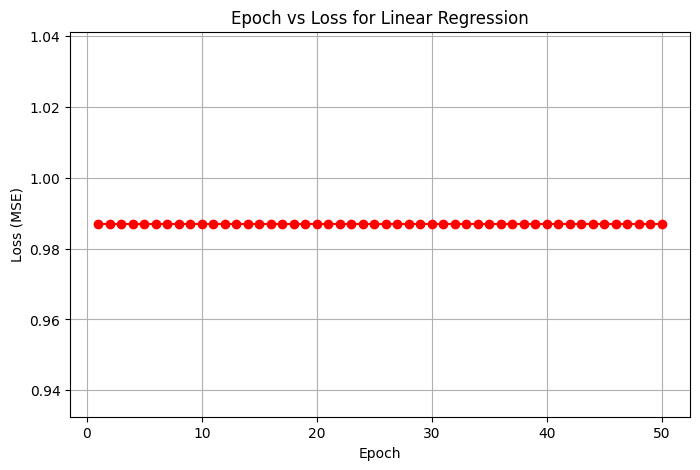

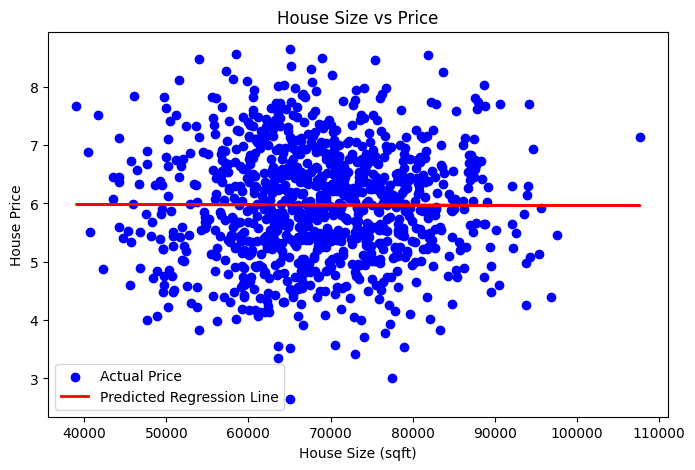

In [1]:
# ================================
# Assignment 2: Linear Regression
# Predict House Price from Size
# ================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from google.colab import files

# Step 2: Upload Dataset from Kaggle (CSV file)
print("Please upload the Kaggle dataset (CSV file).")
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]

# Step 3: Load Dataset
data = pd.read_csv(filename)
print("\nFirst 5 rows of dataset:")
print(data.head())

# Step 4: Select Features (Size and Price)
# NOTE: Adjust column names depending on dataset
if 'sqft_living' in data.columns and 'price' in data.columns:
    dataset = data[['sqft_living', 'price']]
    dataset = dataset.rename(columns={'sqft_living':'Size', 'price':'Price'})
else:
    # If dataset has different column names, pick first 2 columns
    dataset = data.iloc[:, :2]
    dataset.columns = ['Size','Price']

print("\nCleaned Dataset (Size vs Price):")
print(dataset.head())

# Step 5: Split Data into Train/Test
X = dataset[['Size']]
y = dataset['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Samples:", len(X_train))
print("Testing Samples:", len(X_test))

# Step 6: Train Model with Multiple Epochs
model = LinearRegression()
epochs = 50
losses = []

for epoch in range(epochs):
    model.fit(X_train, y_train)  # Training
    y_pred = model.predict(X_train)
    loss = mean_squared_error(y_train, y_pred)
    losses.append(loss)

print("\nModel training completed!")

# Step 7: Test Model Predictions
y_test_pred = model.predict(X_test)

print("\nSample Predictions (First 5):")
for i in range(5):
    print(f"Size: {X_test.iloc[i,0]} sqft → Predicted Price: {y_test_pred[i]:.2f}, Actual Price: {y_test.iloc[i]}")

# Step 8: Plot Epoch vs Loss Graph
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), losses, marker='o', color='red')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Epoch vs Loss for Linear Regression")
plt.grid(True)
plt.show()

# Step 9: Visualize Regression Line
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label="Actual Price")
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label="Predicted Regression Line")
plt.xlabel("House Size (sqft)")
plt.ylabel("House Price")
plt.title("House Size vs Price")
plt.legend()
plt.show()